# Seattle Airbnb
This notebook is the project for section 1 - introduction to data science.

The project centers around a dataset provided by airbnb ( https://www.kaggle.com/datasets/airbnb/seattle/ ), the data available is from 2016 and focus on statistics of Seattle accomodations. It includes data from 2016 and encompasses detailed listings of properties, their reviews and comments, as well as a calendar showing daily prices for each property.

The objective of this notebook is to demonstrate the abilities gained in the context of data wrangling and analysis using Python, along with machine learning libraries like scikit-learn, pandas, and matplotlib. The analysis will not only explore and understand the dataset in-depth but also apply statistical analysis and data visualization techniques to extract relevant insights.

# Phase 1 Business Understanding

## Background

Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.
Content

The following Airbnb activity is included in this Seattle dataset:

- Listings, including full descriptions and average review score
- Reviews, including unique id for each reviewer and detailed comments
- Calendar, including listing id and the price and availability for that day

## Objectives
This project aims to uncover key information that can help hosts, guests and local businesses. 
We will address the following key questions:

### 1. Which neighborhoods in Seattle are the most popular on Airbnb?
This knowledge can assist hosts in planning and promoting their places.
### 2. Does the date affect pricing at all? Or does the price stays the same throught the year?
Learning about these changes can help visitors plan their trips and can help hosts to set competitive pricing strategies.
### 3. What property features are most influential in determining the price of a listing?
This information can help hosts improve their offerings in the competitive airbnb market.

# Phase 2 Data Understanding
Before diving deeper into each question it's necessary to understand the data provided, the dataset contains 3 files.
1. calendar.csv
2. listings.csv
3. reviews.csv

In [1]:
import pandas as pd

#Replace this value with the folder that has the 3 files
folder = "Data"

calendar = pd.read_csv(f"{folder}/calendar.csv")
listings = pd.read_csv(f"{folder}/listings.csv")
reviews = pd.read_csv(f"{folder}/reviews.csv")

The listings.csv file contains general information about listings, some important columns for the analysis are:
For the first question : 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'number_of_reviews'
For the third question : 'accommodates','beds','bathrooms','property_type','room_type','bedrooms','amenities','number_of_reviews', 'neighbourhood_cleansed'

In [2]:
listings

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,8.0,f,NaN,WASHINGTON,f,strict,f,f,8,0.30
3814,8902327,https://www.airbnb.com/rooms/8902327,20160104002432,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.00
3815,10267360,https://www.airbnb.com/rooms/10267360,20160104002432,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
3816,9604740,https://www.airbnb.com/rooms/9604740,20160104002432,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN


The reviews.csv file contains information about the reviews for each listing, there doesn't seem to be relevant information for the proposed analysis other than the amount of reviews per listing, however this information is already available on listings.csv.

In [3]:
reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...
...,...,...,...,...,...,...
84844,3624990,50436321,2015-10-12,37419458,Ryan,The description and pictures of the apartment ...
84845,3624990,51024875,2015-10-17,6933252,Linda,We had an excellent stay. It was clean and com...
84846,3624990,51511988,2015-10-20,19543701,Jaime,"Gran ubicación, cerca de todo lo atractivo del..."
84847,3624990,52814482,2015-11-02,24445024,Jørgen,"Very good apartement, clean and well sized. Si..."


The calendar.csv file contains detailed information about the price of a listing at a daily level.
It's worth noting that this dataset also includes information about the availability of a listing, meaning that if a listing is not available the price is not available as well (NaN).
This data will be useful both for the second and third question.

In [4]:
calendar

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


Let's take a closer look at the data needed for each question.
For the first question we'll use neighbourhoods related data, the data is available on the file listings.csv, on the cell below we can see that the column neighbourhood has some missing data (~11%).
However after closer inspection it seems like the column neighbourhood_cleansed should be enough to answer the first question.
Also worth noting that datatypes seem to be correct.

In [5]:
reviews_by_neighbourhood = listings[['id','neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'number_of_reviews']]
print(reviews_by_neighbourhood.dtypes)
missing_vals = (reviews_by_neighbourhood.isna().sum()/len(reviews_by_neighbourhood))
print(missing_vals[missing_vals > 0])
print("")
reviews_by_neighbourhood

id                               int64
neighbourhood                   object
neighbourhood_cleansed          object
neighbourhood_group_cleansed    object
number_of_reviews                int64
dtype: object
neighbourhood    0.108958
dtype: float64



,id,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,number_of_reviews
0,241032,Queen Anne,West Queen Anne,Queen Anne,207
1,953595,Queen Anne,West Queen Anne,Queen Anne,43
2,3308979,Queen Anne,West Queen Anne,Queen Anne,20
3,7421966,Queen Anne,West Queen Anne,Queen Anne,0
4,278830,Queen Anne,West Queen Anne,Queen Anne,38
...,...,...,...,...,...
3813,8101950,Fremont,Fremont,Other neighborhoods,1
3814,8902327,Portage Bay,Portage Bay,Capitol Hill,2
3815,10267360,NaN,Rainier Beach,Rainier Valley,0
3816,9604740,NaN,Madison Park,Capitol Hill,0


For the second question we need to check data contained on the dataset calendar.csv, by looking at the cell below we can see that there are a few issues with the data:
1. The date column is being treated as an object, not as a date.
2. Price has a special format: $#,###.## which should be converted to a decimal
3. There's missing data, however this is the case when a listing has available = 'f'
For this scenario it makes sense to drop the missing values (available = 'f') as they don't provide useful information.
To answer this question there's a simple analysis that can be done, which is to compare the median or average price of the listings for each month. 

In [6]:
print(calendar.dtypes)
calendar

listing_id     int64
date          object
available     object
price         object
dtype: object


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


# Phase 3: Data Preparation

Now let's divide preparation needed for each question:
    - For the first question data on listings.csv can be used as is
    - For the second question data on calendar.csv we'll need to correct datatypes, process the price and remove values where available=f
    - For the third question we'll need to further analyze data and possibly join listings.csv with calendar.csv

In short, we'll only need to prep data for questions 2 and 3.

### Data preparation for question 2
Steps:
- Correct datatypes
- Process price column
- Remove data where available = f

Notes:
We'll use the file helpers.py that has a function to convert prices to floats

Result:
Dataframe available_listings with the data needed to answer question 2

In [7]:
from helpers import price_to_float

# The first step moving forward is to pre-process the data, here are the steps:
# 1. Drop available = 'f' , as the values won't be useful to answer the question
# 2. Convert the 'price' column to a float
# 3. Convert the 'date' column from object to date and extract the month

# Step 1. frop available = 'f'
available_listings = calendar[calendar['available'] == 't'].copy() #Since we'll process data we need to copy the df to avoid warnings
# Checking if there's any missing data
missing_vals = (available_listings.isna().sum()/len(available_listings))
print("Columns with missing values")
print(missing_vals[missing_vals > 0])
print("")

# Step 2. Convert price to float, to do this we'll use a function from helpers.py
available_listings['price'] = price_to_float(available_listings['price'])

# Step 3. Extract the month from the 'date' column
available_listings['month'] = pd.to_datetime(available_listings['date']).dt.month
available_listings['year'] = pd.to_datetime(available_listings['date']).dt.year
available_listings['month_year'] = pd.to_datetime(available_listings['date']).dt.to_period('M')

# Step 4. Drop unnecessary columns
available_listings.drop(['available'],axis=1,inplace=True)

print(available_listings.dtypes)
print("")

# This is the dataframe that we'll use for analysis
available_listings

Columns with missing values
Series([], dtype: float64)

listing_id        int64
date             object
price           float64
month             int32
year              int32
month_year    period[M]
dtype: object



,listing_id,date,price,month,year,month_year
0,241032,2016-01-04,85.0,1,2016,2016-01
1,241032,2016-01-05,85.0,1,2016,2016-01
9,241032,2016-01-13,85.0,1,2016,2016-01
10,241032,2016-01-14,85.0,1,2016,2016-01
14,241032,2016-01-18,85.0,1,2016,2016-01
...,...,...,...,...,...,...
1393207,10208623,2016-01-06,87.0,1,2016,2016-01
1393208,10208623,2016-01-07,87.0,1,2016,2016-01
1393211,10208623,2016-01-10,87.0,1,2016,2016-01
1393212,10208623,2016-01-11,87.0,1,2016,2016-01


### Data preparation for question 3
Steps:
- Impute missing values
- Process dictionary column 'amenities'
- Join data with calendar.csv
- Use correct datatypes

Notes:
We'll use the file helpers.py that has all needed functions

Result:
Dataframe processed_listings with the data needed to answer question 3

In [8]:
import pandas as pd
from helpers import percentage_to_float, price_to_float, process_dict_column, replace_with_median, replace_with_mode, fill_with_value
# Decide which columns to use
listings_cols_to_read = ['id','accommodates','beds','bathrooms','property_type'
                         ,'room_type','bedrooms','amenities','number_of_reviews', 'neighbourhood_cleansed']
columns_replace_no_data = ['property_type']
columns_replace_median = ['bathrooms','bedrooms','beds']
columns_replace_no_data = ['property_type']

# Processing steps include : transform price to float, fill missing values and transform amenitites from json-like to array
processing_steps = [
    {'columns':columns_replace_median,'step':replace_with_median},
    {'columns':columns_replace_no_data,'step':fill_with_value,'param': 'No data'},
    {'columns':['amenities'],'step':process_dict_column}
]

# listing_id        int64
# date             object
# price           float64
# month             int32
# year              int32
# month_year    period[M]

available_listings_with_filtered_cols = available_listings[['listing_id','price','month','year']]
listings_with_filtered_cols = listings[listings_cols_to_read]

# Joining calendar and listings
listings_by_date = listings_with_filtered_cols.merge(available_listings_with_filtered_cols,how="inner",left_on="id",right_on="listing_id")
listings_by_date.drop(['id','listing_id'],axis=1,inplace=True)

print(listings_by_date.dtypes)

# Executing processing steps
for step in processing_steps:
    for column in step['columns']:
        param = (step['param'],) if 'param' in step else ()
        listings_by_date[column] = step['step'](listings_by_date[column], *param)

# Extracting dummy variables from ammenities column
print("processing amenities - dummies")
amenities_dummies = listings_by_date['amenities'].apply(lambda x: pd.Series(1, index=x)).fillna(0)
amenities_dummies = amenities_dummies.astype(int)
print("processing amenities - concat")
listings_by_date = pd.concat([listings_by_date.drop('amenities', axis=1), amenities_dummies], axis=1)
print("processing categorical columns")
categorical_columns = listings_by_date.select_dtypes(include=['object']).columns
processed_listings = pd.get_dummies(listings_by_date, columns=categorical_columns, drop_first=True)

# Transform booleans to 1s and 0s for consistency
for col in processed_listings.select_dtypes(include=['bool']).columns:
    processed_listings[col] = processed_listings[col].astype(int)

# Sanity check we shouldn't have any missing data
missing_vals = (processed_listings.isna().sum()/len(processed_listings))
print(missing_vals[missing_vals > 0])

# This is the dataframe that we'll use for analysis
processed_listings

accommodates                int64
beds                      float64
bathrooms                 float64
property_type              object
room_type                  object
bedrooms                  float64
amenities                  object
number_of_reviews           int64
neighbourhood_cleansed     object
price                     float64
month                       int32
year                        int32
dtype: object
processing amenities - dummies
processing amenities - concat
processing categorical columns
Series([], dtype: float64)


,accommodates,beds,bathrooms,bedrooms,number_of_reviews,price,month,year,TV,Cable TV,...,neighbourhood_cleansed_Victory Heights,neighbourhood_cleansed_View Ridge,neighbourhood_cleansed_Wallingford,neighbourhood_cleansed_Wedgwood,neighbourhood_cleansed_West Queen Anne,neighbourhood_cleansed_West Woodland,neighbourhood_cleansed_Westlake,neighbourhood_cleansed_Whittier Heights,neighbourhood_cleansed_Windermere,neighbourhood_cleansed_Yesler Terrace
0,4,1.0,1.0,1.0,207,85.0,1,2016,1,1,...,0,0,0,0,1,0,0,0,0,0
1,4,1.0,1.0,1.0,207,85.0,1,2016,1,1,...,0,0,0,0,1,0,0,0,0,0
2,4,1.0,1.0,1.0,207,85.0,1,2016,1,1,...,0,0,0,0,1,0,0,0,0,0
3,4,1.0,1.0,1.0,207,85.0,1,2016,1,1,...,0,0,0,0,1,0,0,0,0,0
4,4,1.0,1.0,1.0,207,85.0,1,2016,1,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934537,3,1.0,1.5,2.0,0,87.0,1,2016,1,1,...,0,0,0,0,0,0,0,0,0,0
934538,3,1.0,1.5,2.0,0,87.0,1,2016,1,1,...,0,0,0,0,0,0,0,0,0,0
934539,3,1.0,1.5,2.0,0,87.0,1,2016,1,1,...,0,0,0,0,0,0,0,0,0,0
934540,3,1.0,1.5,2.0,0,87.0,1,2016,1,1,...,0,0,0,0,0,0,0,0,0,0


# Phase 4: Data modeling

# 1. Which neighborhoods in Seattle are the most popular on Airbnb? 

### Answer: Broadway , Belltown, Fremont, Wallingford and Minor

To answer this question let's start by checking the relevant data and determine if it needs preprocessing.



From the graph generated bellow it's possible to conclude the following:
1. By far, broadway is the most popular neighborhood, having the highest number of reviews by a significant margin.
2. Belltown, Fremont, Wallingford and Minor follow in popularity.
3. After the top 5 of most popular neighborhoods there's a significant drop in popularity.
4. In short, the most popular neighborhoods are Broadway, Belltown, Fremont, Wallingford and Minor.

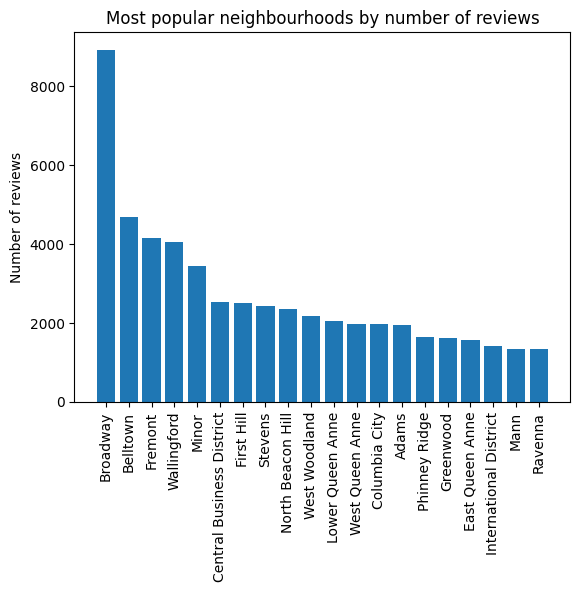

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
top_neighbourhoods_by_reviews = reviews_by_neighbourhood.groupby('neighbourhood_cleansed')['number_of_reviews'].sum().sort_values(ascending=False).head(20)

labels = list(top_neighbourhoods_by_reviews.index)
values = list(top_neighbourhoods_by_reviews.values)

ax.bar(labels,values)

ax.set_ylabel('Number of reviews')
ax.set_title('Most popular neighbourhoods by number of reviews')
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=90)

plt.show()

# 2. Does the date affect pricing at all? Or does the price stays the same throught the year?

### Answer: Yes, the date affects pricing , June to August are the months with highest prices for airbnb accomodation

To answer this question it's important to look at the data provided on calendar.csv

From the graph below we can conclude that there's an increase in prices starting from May it reaches the top at July and then prices start to decline, also it can be seen that January is the month where prices are the lowest.
In short, the price is affected by the month of the year:
1. January to March prices are the lowest.
2. June to August prices are the highest.

<Axes: title={'center': 'Percentage Difference from Average Price by Month'}, xlabel='month_year'>

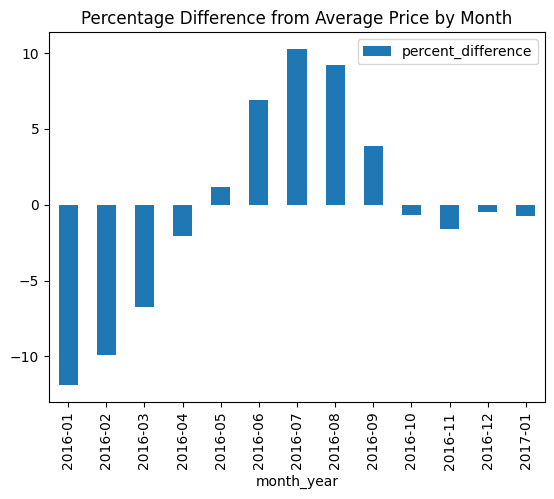

In [10]:
overall_avg = available_listings['price'].mean()
monthly_avg = available_listings.groupby('month_year')['price'].mean().reset_index()
monthly_avg['percent_difference'] = ((monthly_avg['price'] - overall_avg) / overall_avg) * 100
monthly_avg.plot(x='month_year', y='percent_difference', kind='bar', title='Percentage Difference from Average Price by Month')

# 3. What property features are most influential in determining the price of a listing?

### Answer: The most influential properties are: 
### 1. Number of bedrooms
### 2. Whether or not the room is private or shared
### On a minor level it seems like some other properties that affect price are:
### 1. Bathrooms
### 2. If there's an elevator in the building
### 3. Number of reviews
### 4. If Breakfast is included

To answer this question machine learning will be leveraged to try to explain what determines the price of an airbnb listing

I prepared a couple of files helpers.py and training_helper.py that contain some boilerplate code that will help to reduce the amount code on the notebook, feel free to examine the code.
The first step is to preprocess data to prepare it to be fed to machine learning algorithms, the overall processing that has to be performed is:
1. Decide which columns to use (discussed on the exploratory analsys on this notebook
2. Replace missing values
3. Convert prices to floats
4. Process the amenity column (transform it from a json-like format to dummy variables
5. Join calendar and listings
6. Extract year and month from the date column on calendar dataset

Now that data is processed let's look at the distribution of prices.
From the graph below there are a few takeaways:
1. Data is skewed. It's possible to have better model performance by applying a log transformation to the data.
2. There seem to be some outliers.

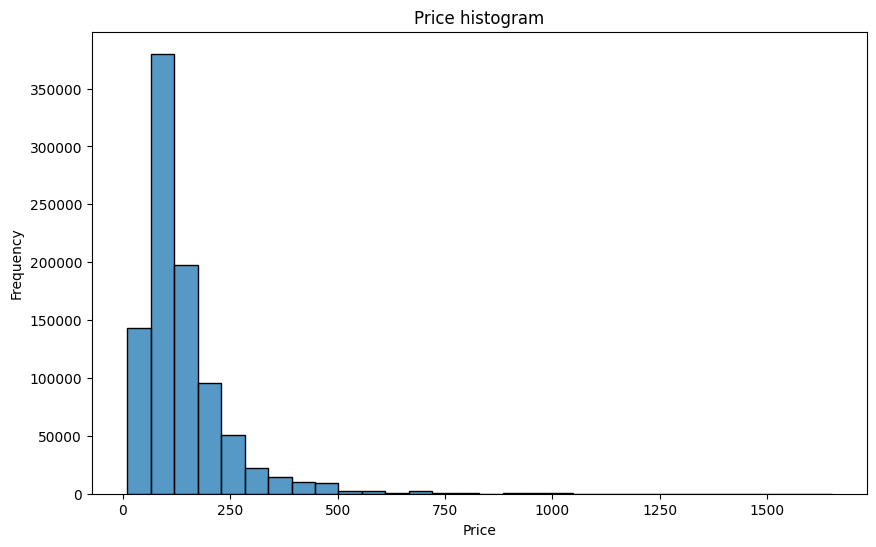

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(listings_by_date['price'], kde=False, bins=30)
plt.title('Price histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Since the data is not 100% a normal distribution here are the models that we'll try to use to explain which are the features that determine price:
1. LinearRegression (we'll use it as a baseline)
2. Ridge
3. RandomForest
4. XGBoost
From the cell below it seems that random forest and xgboost have incredible performance, most likely this is due to overfitting

In [12]:
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
import xgboost
from training_helpers import ModelsTrainer

# First we'll instantiate the models
linear_regression = LinearRegression()
ridge = Ridge()
forest = RandomForestRegressor(n_estimators=100,criterion='friedman_mse',n_jobs=-1)
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)

# Previously I created a class that contains the functionality needed to train and test different models
models_trainer = ModelsTrainer('price',processed_listings)

# Let's start by training each model with the models trainer class 
models_trainer.train_model_with_split(linear_regression,"Linear Regression")
models_trainer.train_model_with_split(ridge,"Ridge")
# Random forest seems to have a near perfect performance
models_trainer.train_model_with_split(forest,"Random Forest")
models_trainer.train_model_with_split(xgb,"XGBoost")
# As it can be seen random forest and xgboost seem to have an incredible performance, therefore we'll try a more rigorous testing

Linear Regression MSE train 4007.13, test: 3930.014
Linear Regression R^2 0.638, test: 0.641
Ridge MSE train 4007.13, test: 3930.022
Ridge R^2 0.638, test: 0.641
Random Forest MSE train 176.677, test: 201.494
Random Forest R^2 0.984, test: 0.982
XGBoost MSE train 1147.35, test: 1158.387
XGBoost R^2 0.896, test: 0.894


We'll use k-fold cross validation to make sure that we are not overfitting.
After this test we can see that there's a dramatic fall in performance, the models are only able to explain roughly 40 to 55 percent of the variability of the dataset.
Moreover the error is pretty dramatic.
Please note that executing this test can take time

In [13]:
models_trainer.calculate_model_metrics("Random Forest",forest,5)
models_trainer.calculate_model_metrics("XGBoost",xgb,5)

Training model: Random Forest
MSE in each fold: Random Forest [6665.09938919 9101.30236053 4631.88143159 3344.43704107 6457.31662701]
Average MSE: Random Forest 6040.007369879032
R2 in each fold: Random Forest [0.60085886 0.24044195 0.35141209 0.5187807  0.42904028]
Average R2: Random Forest 0.42810677676505254
Training model: XGBoost
MSE in each fold: XGBoost [6048.41265634 5869.58828081 3289.1304511  2719.93814641 5802.03391626]
Average MSE: XGBoost 4745.8206901847225
R2 in each fold: XGBoost [0.6377893  0.5101478  0.53943332 0.60863765 0.48698076]
Average R2: XGBoost 0.5565977663650681


It's possible that outliers are hurting the predictions, let's have a look at them
Also since data is skewed it may be possible to increase performance by applying log transform to price.
From the graph below we can see a good chunk of outliers.

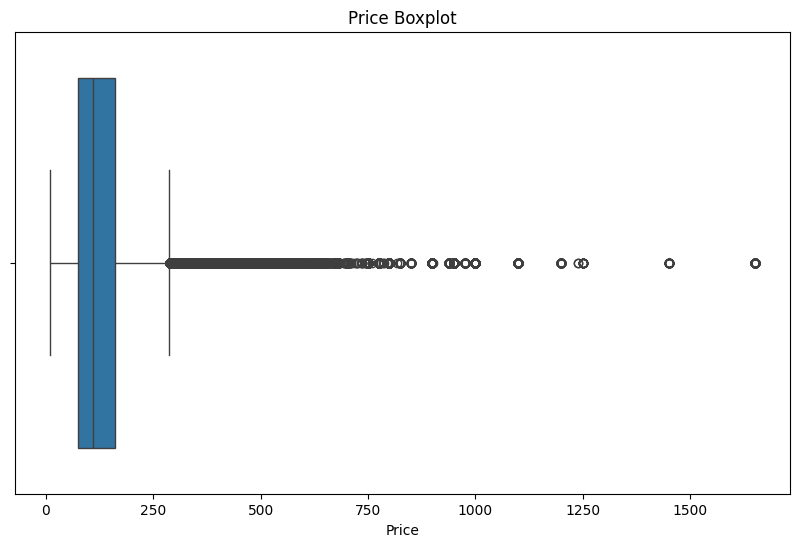

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=processed_listings['price'])
plt.title('Price Boxplot')
plt.xlabel('Price')
plt.show()

To determine outliers one rule of thumb can be anything that's 2 standard deviations away from the median.
In this case anything above 319.12 can be considered an outlier.
However by also using the data in the graph above we'll set a cut-off for data at 750, since we start seeing less and less outliers from that point forward, hopefully this can make the model better generalize to new data.

In [15]:
import numpy as np
median = np.median(processed_listings['price'])
stdv = np.std(processed_listings['price'])

# Define limits for outliers
lower_bound = median - ( 2 * stdv )
upper_bound = median + ( 2 * stdv )

print(lower_bound)
print(upper_bound)

outliers = listings_by_date[(listings_by_date['price'] >= upper_bound)]
outliers

-101.1256276300249
319.1256276300249


,accommodates,beds,bathrooms,property_type,room_type,bedrooms,number_of_reviews,neighbourhood_cleansed,price,month,...,Elevator in Building,Lock on Bedroom Door,Wheelchair Accessible,Gym,,Pool,Smoking Allowed,Other pet(s),Doorman,Washer / Dryer
634,4,1.0,1.0,Apartment,Entire home/apt,1.0,43,West Queen Anne,358.0,12,...,0,0,0,0,0,0,0,0,0,0
635,4,1.0,1.0,Apartment,Entire home/apt,1.0,43,West Queen Anne,439.0,1,...,0,0,0,0,0,0,0,0,0,0
636,4,1.0,1.0,Apartment,Entire home/apt,1.0,43,West Queen Anne,400.0,1,...,0,0,0,0,0,0,0,0,0,0
637,11,7.0,4.5,House,Entire home/apt,5.0,20,West Queen Anne,975.0,1,...,0,0,0,0,0,0,0,0,0,0
638,11,7.0,4.5,House,Entire home/apt,5.0,20,West Queen Anne,750.0,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933990,6,3.0,2.0,House,Entire home/apt,3.0,1,Fremont,359.0,2,...,0,0,1,0,0,0,0,0,0,0
933991,6,3.0,2.0,House,Entire home/apt,3.0,1,Fremont,359.0,2,...,0,0,1,0,0,0,0,0,0,0
933992,6,3.0,2.0,House,Entire home/apt,3.0,1,Fremont,359.0,2,...,0,0,1,0,0,0,0,0,0,0
933993,6,3.0,2.0,House,Entire home/apt,3.0,1,Fremont,359.0,2,...,0,0,1,0,0,0,0,0,0,0


# Phase 5 Evaluation

In [16]:
from helpers import apply_log_transform

listings_by_date_less_upper_bound = processed_listings[processed_listings['price'] <= upper_bound].copy()
listings_by_date_less_750 = processed_listings[processed_listings['price'] <= 750].copy()

print("Total records less than upper bound",len(listings_by_date_less_upper_bound))
print("Total records less than 750",len(listings_by_date_less_750))

listings_by_date_less_upper_bound['price'] = apply_log_transform(listings_by_date_less_upper_bound['price'])
listings_by_date_less_750['price'] = apply_log_transform(listings_by_date_less_750['price'])

models_trainer = ModelsTrainer('price',listings_by_date_less_upper_bound)
models_trainer_2 = ModelsTrainer('price',listings_by_date_less_750)

print("Models trainer 1 metrics")
models_trainer.calculate_model_metrics("Random Forest",forest,5)
models_trainer.calculate_model_metrics("XGBoost",xgb,5)
print("")
print("Models trainer 2 metrics")
models_trainer_2.calculate_model_metrics("Random Forest",forest,5)
models_trainer_2.calculate_model_metrics("XGBoost",xgb,5)

Total records less than upper bound 882096
Total records less than 750 931931
Models trainer 1 metrics
Training model: Random Forest
MSE in each fold: Random Forest [0.1132673  0.13640663 0.1403012  0.12864948 0.13326058]
Average MSE: Random Forest 0.13037703739703033
R2 in each fold: Random Forest [0.5435454  0.40585248 0.48478301 0.41730633 0.47258167]
Average R2: Random Forest 0.46481377886534697
Training model: XGBoost
MSE in each fold: XGBoost [0.08403461 0.11044964 0.11240036 0.10077323 0.10327169]
Average MSE: XGBoost 0.10218590739294098
R2 in each fold: XGBoost [0.66134989 0.51891354 0.58724107 0.54356654 0.59127161]
Average R2: XGBoost 0.5804685290082602

Models trainer 2 metrics
Training model: Random Forest
MSE in each fold: Random Forest [0.13375707 0.1634801  0.14577977 0.13760483 0.14648306]
Average MSE: Random Forest 0.1454209676127173
R2 in each fold: Random Forest [0.65037475 0.49279217 0.57206863 0.51247578 0.54827284]
Average R2: Random Forest 0.5551968353934922
Trai

After all of this testing seems like the models will have a more consistent performance with records that have prices less than or equal to 750, at this point we could try more models and also optimizing hyperparameters, but for now it should be enough to answer the question.
We'll train XGBoost and RandomForest as they had the best performance and see which are the most important features.
The results are available in the cells below, bottomline, it seems like for both models the key features in determining price are:
1. room_type_Shared room
2. room_type_Private room
3. Bedrooms
On a minor level it seems like some other properties that affect price are:
1. Bathrooms
2. If there's an elevator in the building
3. Number of reviews
4. If Breakfast is included

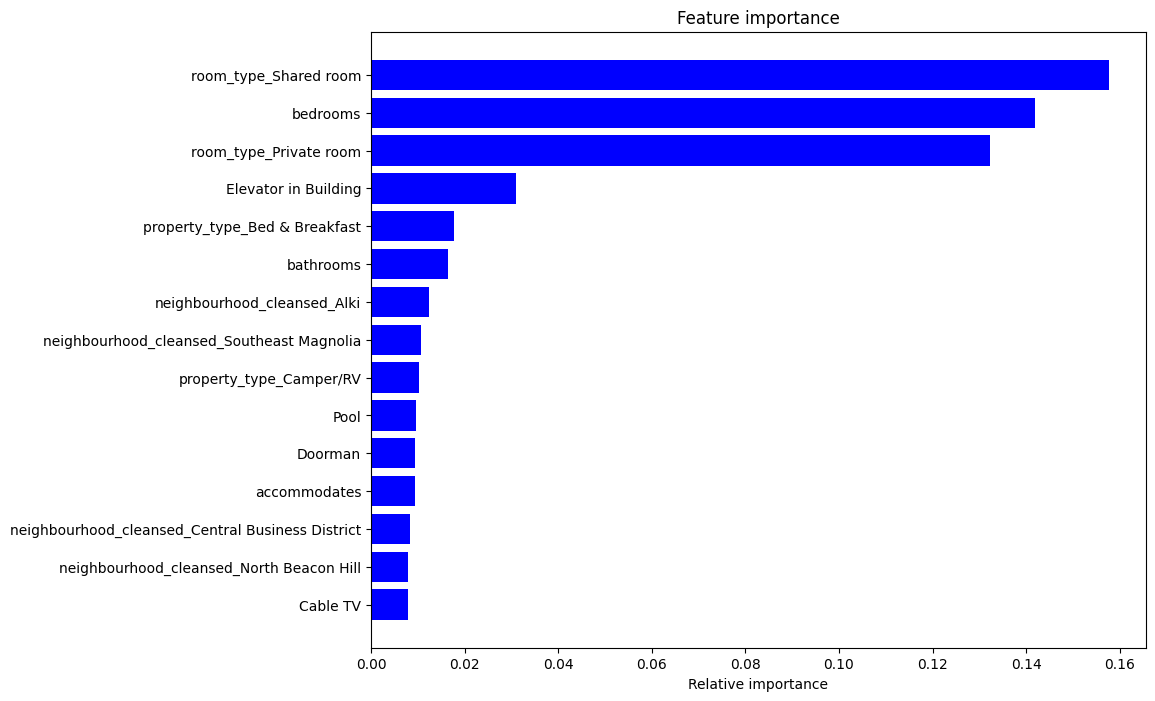

In [17]:
models_trainer_2.train_final_model(xgb,"XGBoost")
models_trainer_2.plot_feature_importance("XGBoost")

In [ ]:
models_trainer_2.train_final_model(forest,"RandomForest")
models_trainer_2.plot_feature_importance("RandomForest")